# Convolutional Neural Networks

Today we want to train and evaluate Convolutional Neural Networks. First execute the cells below to load the Cifar-10 dataset, which contains small image of frogs, birds, trucks, ships. The data set has 60000 32x32 colour images in 10 mutually exclusive classes with 50000 training images and 10000 test images (see Krizhevsky, Alex, and Geoffrey Hinton. "Learning multiple layers of features from tiny images." (2009): 7.)

In [1]:
from pipetorch.data import cifar
from pipetorch.train import *
from pipetorch.model import ConvNet
import torch.nn as nn
import torch.nn.functional as F
import torchvision

using gpu 3


In [2]:
data = cifar()
str_labels = ['airplane','automobile','bird', 'cat', 'deer', 'dog','frog','horse','ship','truck']

### Data Investigation
Let's investigate the data briefly. First, we can view a sample, and it appears X is shaped (64, 3, 32, 32). 64 is the batch-size (there are 64 image in X), 3 is the number of channels of each image which is 3 because every color image consists of a Red, Green and Blue channel. The 32x32 is the image size

In [3]:
X, y = data.sample()
X.shape

torch.Size([64, 3, 32, 32])

Let's have a look at the images. We can use the function show_batch() from pipetorch for this. The y above the image indicates the class number (0-9) we want to predict.

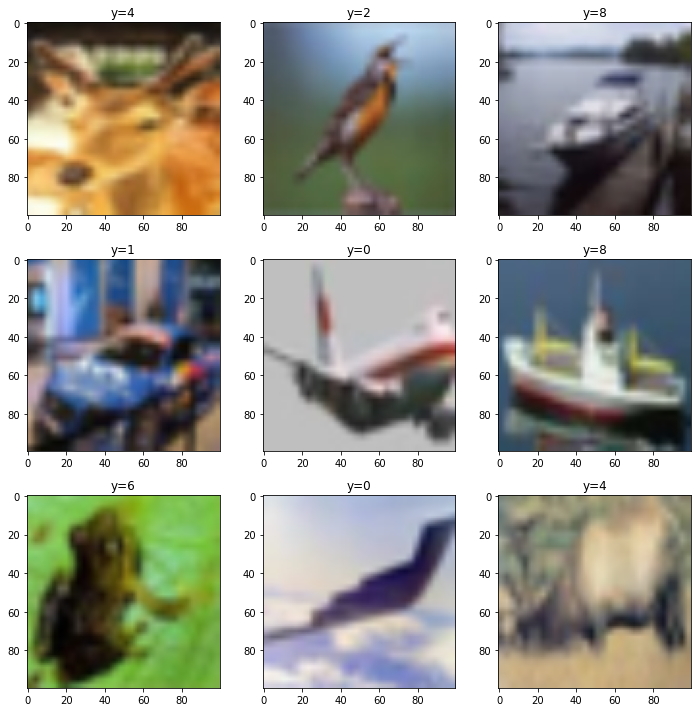

In [4]:
data.show_batch()

### Modelling

Now it's time to create a Convolutional Neural Network. To instantiate a ConvNet, we specify the numbers of 'channels' in each layer. When you think of channels, every image holds the amount of red, green, and blue in every pixel. This information is separated into 3 channels (RGB). Similarly, ConvNets can create multiple abstract representations of an image, and for every representation it needs a separate channel. Therfore, our ConvNet needs start with '3' input channels. It has to end with `num_classes=10` because there are 10 possible classes.

In [5]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #Convolutional layer: torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
        self.conv1 = nn.Conv2d(3, 5, 3, padding="same") #input image 32x32, 3 colour channels (RBG)
        #Pooling layer: torch.nn.MaxPool2d(kernel_size, stride=None, padding=0)
        self.pool = nn.MaxPool2d(2, 2) # reduces image size to half
        self.conv2 = nn.Conv2d(5, 10, 3, padding="same")
        self.lin = nn.Linear(8*8*10, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.lin(x)
        return x
    
    def post_forward(self, y):
        # convert predictions of 10 classes to one winner
        return torch.argmax(y, axis=1)


Convnet = Net()

In [6]:
# summary of the network
Convnet

Net(
  (conv1): Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (lin): Linear(in_features=640, out_features=10, bias=True)
)

###  Training
Use the model above to train it with the trainer function from pipetorch

In [84]:
# add the model
t = trainer(... , nn.CrossEntropyLoss(), data, metrics=accuracy_score, gpu=0)


In [85]:
# add the number of epochs
t.train(..., lr=1e-3)

Total:   0%|          | 0/600960 [00:00<?, ?it/s]

 1 7.15s trainloss=1.67077 validloss=1.44542 accuracy_score=0.48640 
 2 6.89s trainloss=1.40454 validloss=1.35692 accuracy_score=0.51580 
 3 6.84s trainloss=1.32168 validloss=1.30242 accuracy_score=0.53450 
 4 6.72s trainloss=1.26591 validloss=1.25421 accuracy_score=0.55460 
 5 6.83s trainloss=1.21868 validloss=1.24160 accuracy_score=0.55870 
 6 6.73s trainloss=1.18376 validloss=1.20387 accuracy_score=0.57530 
 7 6.47s trainloss=1.15863 validloss=1.19790 accuracy_score=0.57640 
 8 6.46s trainloss=1.13749 validloss=1.18103 accuracy_score=0.57970 
 9 6.78s trainloss=1.12028 validloss=1.18441 accuracy_score=0.57890 
10 7.09s trainloss=1.10342 validloss=1.16588 accuracy_score=0.58830 


### Validation 
Investigate the performance on the validation and training data. You can use the pipetorch functions validation_curve() and/or learning_curve() for this

#### Change the number of output channels of the first conv layer to a higher value

Train the model again. Observe the performance, does the observed change meet your expectation?

#### Configure a network with 3 layers
Train the model again and observe the performance again, how did it change compared to before?